## Automobile Price Prediction

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the dataset
auto_data = pd.read_csv('AutoData (1).csv')

In [6]:
pd.set_option('display.max_columns', None)
auto_data.head(20)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [8]:
auto_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
auto_data.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

no null values!!

## Extracting car company from car name

In [12]:
auto_data['make'] = auto_data['make'].str.split(' ',expand=True)

Handling duplicate values in car name

nissan and Nissan are same

toyota and toyouta are same

vokswagen , volkswagen and vw are same

mazda and maxda are same

porcshce and porsche are same

In [14]:
auto_data['make'] = auto_data['make'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [15]:
auto_data['symboling']=auto_data['symboling'].astype('str')

## Categorical columns

In [16]:
categorical_cols=auto_data.select_dtypes(include=['object']).columns

In [17]:
auto_data[categorical_cols].head(2)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


## Numerical columns

In [18]:
numerical_cols=auto_data.select_dtypes(exclude=['object']).columns

In [20]:
auto_data[numerical_cols].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


## 2. EDA

In [21]:
auto_data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Visualise different car names 

In [22]:
df=pd.DataFrame(auto_data['make'].value_counts()).reset_index().rename(columns={'index':'car_name','make': 'count'})

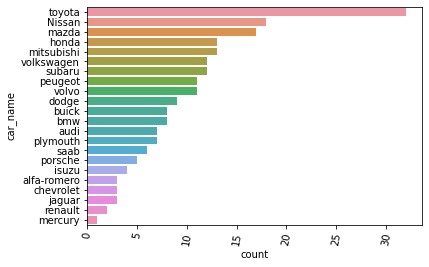

In [23]:
plot = sns.barplot(y='car_name',x='count',data=df)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

According to the dataset-

-Toyota is the most popular car

-mercury is the least popular car

### Fuel type Ratio

In [28]:
df=pd.DataFrame(auto_data['fueltype'].value_counts())

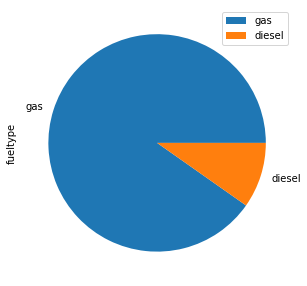

In [29]:
plot = df.plot.pie(y='fueltype', figsize=(5, 5))

We can observe gas is more preferred over diesel by the customers

### Price distribution of cars

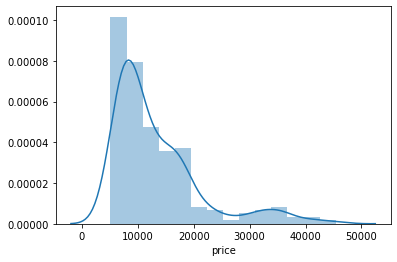

In [31]:
sns.distplot(auto_data['price'],kde=True)
plt.show()

Price distribution is highly skewed

We can observe that, most of the cars fall under the price range of 5000 to 20000

### Price distribution of diesel vs gas car

Text(0.5, 1.0, 'Distribution of price of diesel vehicles')

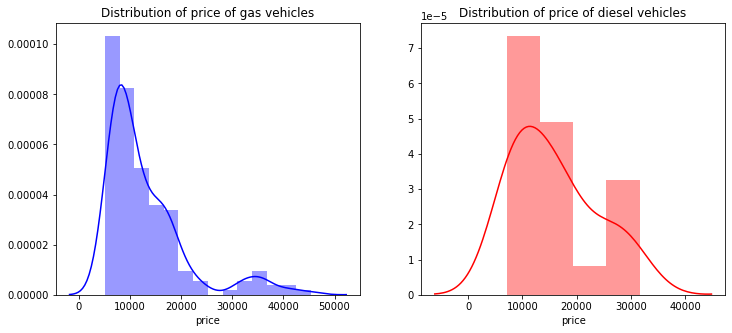

In [35]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(auto_data[(auto_data.fueltype== 'gas')]['price'],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(auto_data[(auto_data.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of price of diesel vehicles')

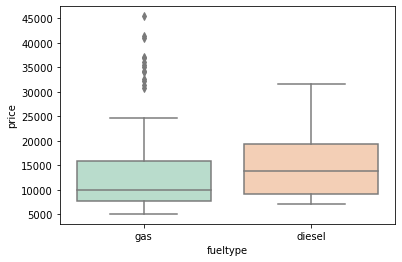

In [37]:
sns.boxplot(x = 'fueltype', y = 'price', data = auto_data,palette='Pastel2')
plt.show()

We can observe the price of diesel vehicles is more than that of gas vehicles

Also there are some outliers in gas vehicles

### Aspiration ratio 

In [38]:
df=pd.DataFrame(auto_data['aspiration'].value_counts())

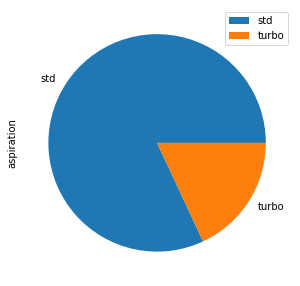

In [39]:
plot = df.plot.pie(y='aspiration', figsize=(5, 5))

*Most of the cars have standard aspiration

### Price distribution of Std vs Turbo aspiration vehicles

Text(0.5, 1.0, 'Price distribution of Std aspiration vehicles')

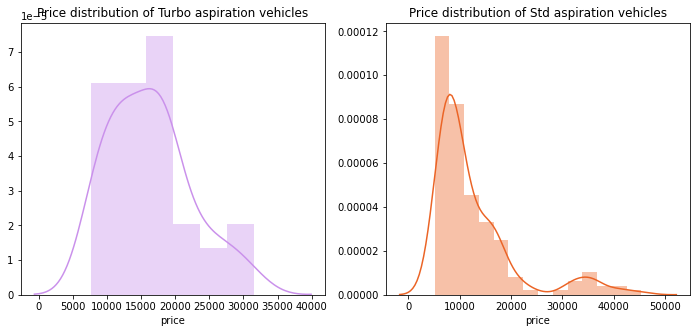

In [40]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(auto_data[(auto_data.aspiration== 'turbo')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of Turbo aspiration vehicles')

ax=f.add_subplot(122)
plot=sns.distplot(auto_data[(auto_data.aspiration == 'std')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of Std aspiration vehicles')

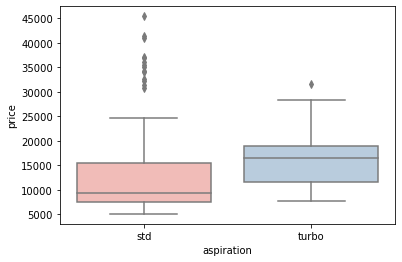

In [42]:
sns.boxplot(x = 'aspiration', y = 'price', data = auto_data,palette='Pastel1')
plt.show()

*Price of turbo is higher in compared to std , although there are some outliers in std price

### Symboling

Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

In [43]:
df=pd.DataFrame(auto_data['symboling'].value_counts()).reset_index().rename(columns={'index':'symboling','symboling':'count'})

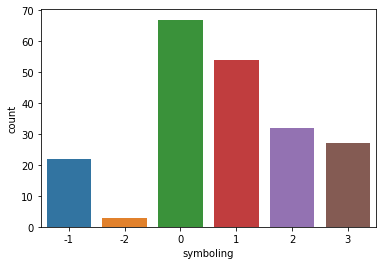

In [44]:
sns.barplot(x='symboling',y='count',data=df)

*Most of the car symboling has 0 value

### Price distribution according to symboling

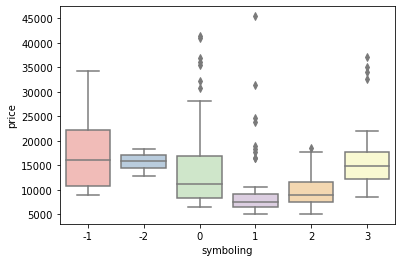

In [45]:
sns.boxplot(x = 'symboling', y = 'price', data = auto_data,palette='Pastel1')

Price of -1 symboling is higher in compare to others

### Door number

In [47]:
df=pd.DataFrame(auto_data['doornumber'].value_counts())

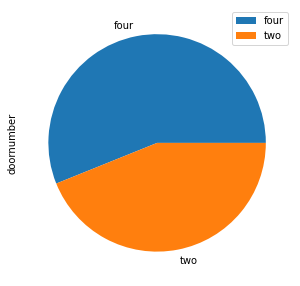

In [48]:
plot = df.plot.pie(y='doornumber', figsize=(5, 5))

*115 cars has four dooors and 90 cars has 2 doors

### Price distribution according to door number

Text(0.5, 1.0, 'Price distribution of cars having four doors')

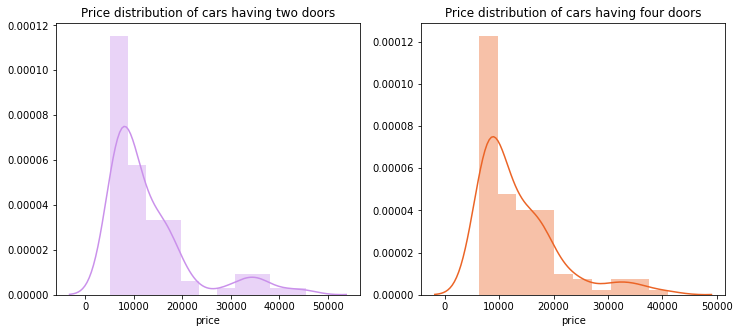

In [49]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(auto_data[(auto_data.doornumber== 'two')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of cars having two doors')

ax=f.add_subplot(122)
plot=sns.distplot(auto_data[(auto_data.doornumber == 'four')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of cars having four doors')

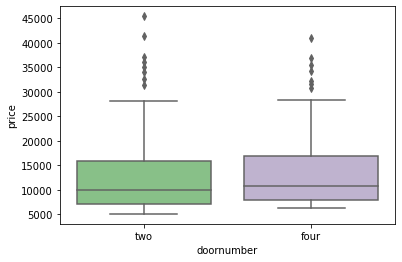

In [50]:
sns.boxplot(x = 'doornumber', y = 'price', data = auto_data,palette='Accent')

*As you can see there is slight difference in distributions of cars having two doors vs cars having 4 doors

### Carbody

In [51]:
df=pd.DataFrame(auto_data['carbody'].value_counts())

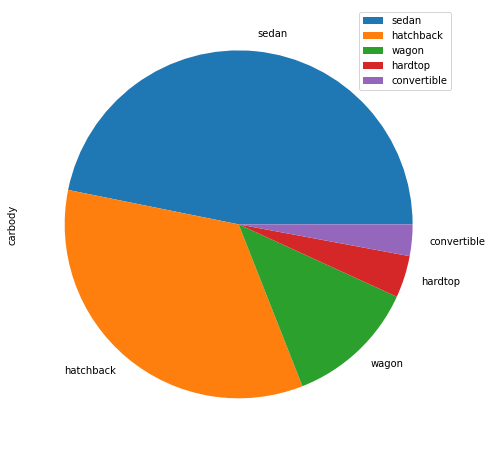

In [52]:
plot = df.plot.pie(y='carbody', figsize=(8, 8))

*as we can observe, majority of car body are sedan and hatchback

### Price distribution according to car body

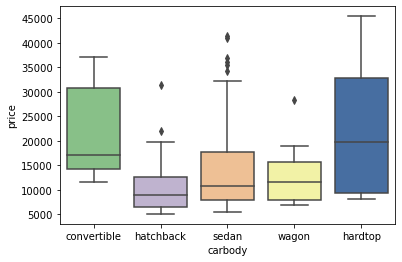

In [53]:
sns.boxplot(x = 'carbody', y = 'price', data = auto_data,palette='Accent')

price of hardtop is very high compare to others

### Drive wheel

In [54]:
df=pd.DataFrame(auto_data['drivewheel'].value_counts())

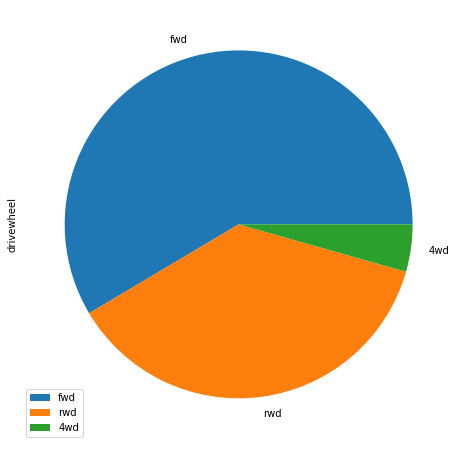

In [55]:
plot = df.plot.pie(y='drivewheel', figsize=(8, 8))

*Maximum cars has fwd drive wheel


### Price distribution according to drive wheel

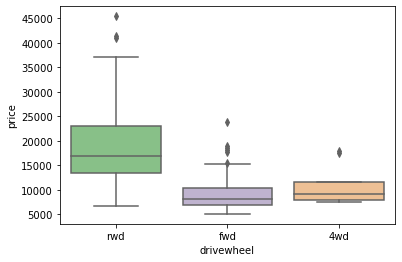

In [56]:
sns.boxplot(x = 'drivewheel', y = 'price', data = auto_data,palette='Accent')

*Price range of rwd drivewheel cars is quite high compare to others

### Engine location

In [57]:
df=pd.DataFrame(auto_data['enginelocation'].value_counts())

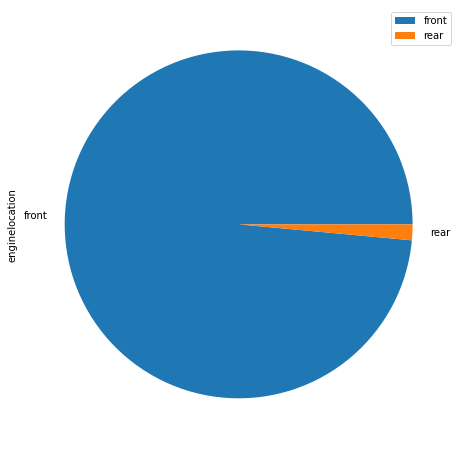

In [58]:
plot = df.plot.pie(y='enginelocation', figsize=(8, 8))

*less number of cars having rear engine

### Engine type

In [59]:
df=pd.DataFrame(auto_data['enginetype'].value_counts())

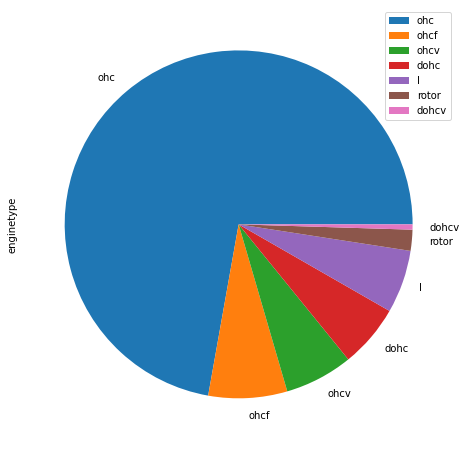

In [60]:
plot = df.plot.pie(y='enginetype', figsize=(8, 8))
plt.show()

*Maximum number of engine type are of 'ohc'

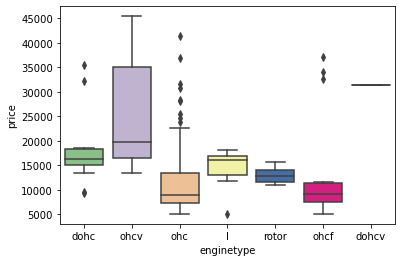

In [61]:
sns.boxplot(x = 'enginetype', y = 'price', data = auto_data,palette='Accent')

*price range of ohcv engine cars are quite high in compare to others

### Cylinder number

In [62]:
df=pd.DataFrame(auto_data['cylindernumber'].value_counts())

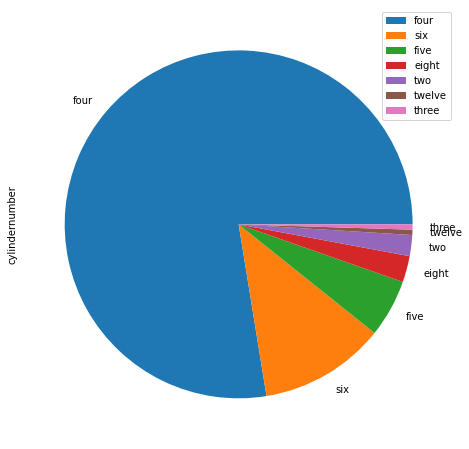

In [63]:
plot = df.plot.pie(y='cylindernumber', figsize=(8, 8))
plt.show()

*maximum cars are of four cylinder number

### Price distribution according to cylinder number

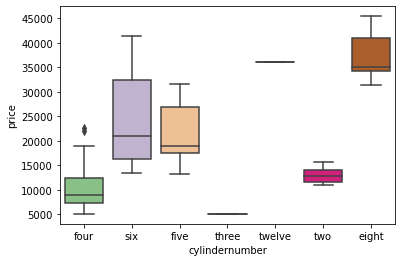

In [64]:
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto_data,palette='Accent')

-there is only 1 car having cylinder number 3 and 12 .

-car having cylinder number eight has higher price range.

### Fuel system

In [65]:
df=pd.DataFrame(auto_data['fuelsystem'].value_counts()).reset_index().rename(columns={'index':'fuelsystem','fuelsystem':'count'})

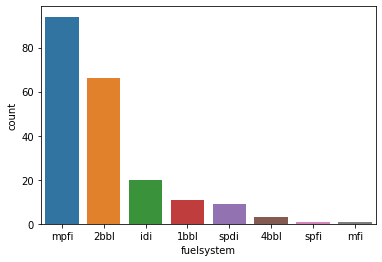

In [66]:
sns.barplot(x='fuelsystem',y='count',data=df)

-most number of cars having fuel system mpfi

-least number of cars having fuel system mfi and spfi

### Price distribution according to fuel system

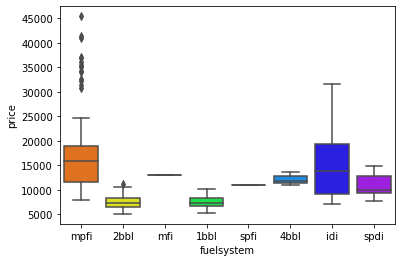

In [67]:
sns.boxplot(x = 'fuelsystem', y = 'price', data = auto_data,palette='gist_rainbow')

## Visualising Numerical features

### Wheel base Vs Price

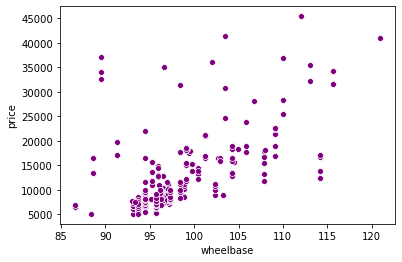

In [69]:
sns.scatterplot(x="wheelbase", y="price", data=auto_data,color='purple')

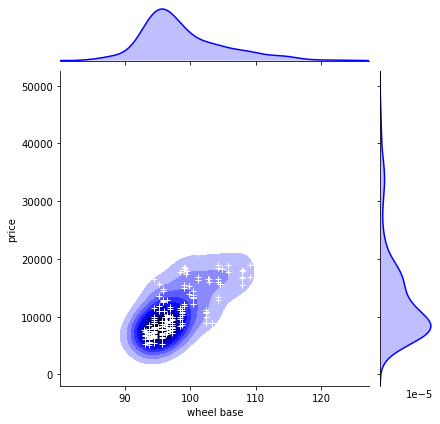

In [70]:
g = sns.jointplot(x="wheelbase", y="price", data=auto_data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("wheel base", "price");

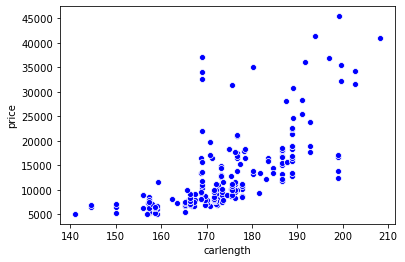

In [72]:
sns.scatterplot(x="carlength", y="price", data=auto_data,color='b')

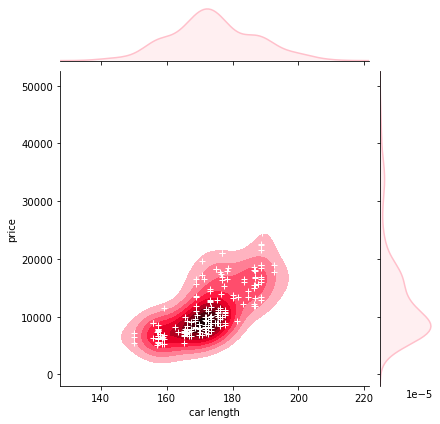

In [73]:
g = sns.jointplot(x="carlength", y="price", data=auto_data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car length", "price");

car length also scattered but less scattered than wheelbase

### Car width Vs Price

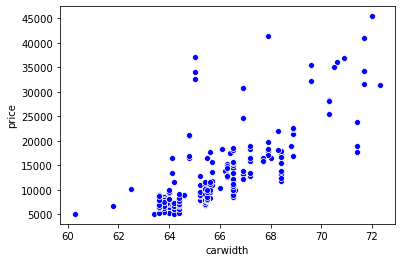

In [75]:
sns.scatterplot(x="carwidth", y="price", data=auto_data,color='b')

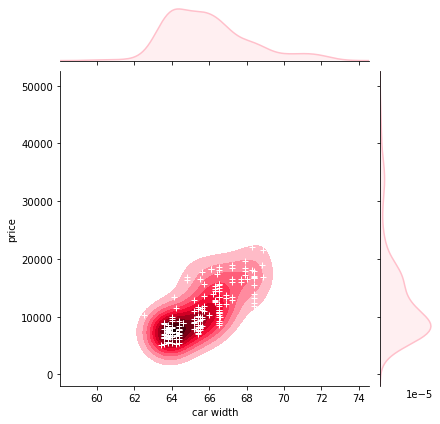

In [76]:
g = sns.jointplot(x="carwidth", y="price", data=auto_data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "price");

### Car length vs Car width

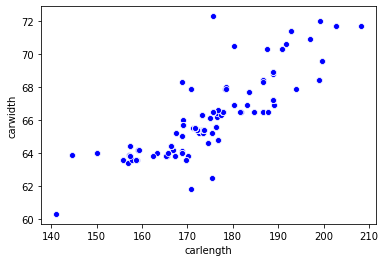

In [77]:
sns.scatterplot(x="carlength", y="carwidth", data=auto_data,color='b')

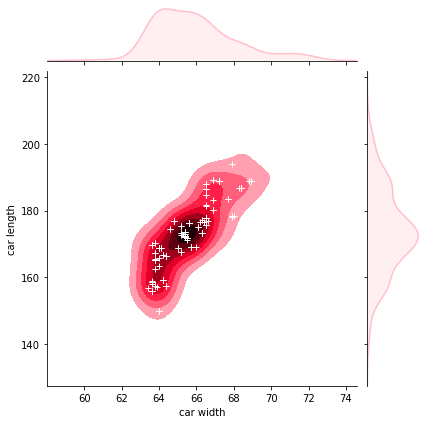

In [78]:
g = sns.jointplot(x="carwidth", y="carlength", data=auto_data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "car length");

 *strong relation is seemed between car length and car width

### Curbweight vs Price

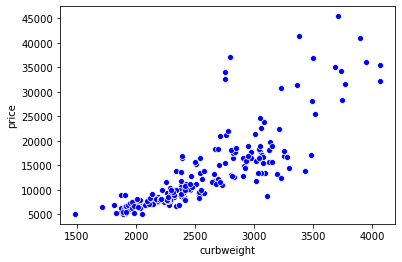

In [79]:
sns.scatterplot(x="curbweight", y="price", data=auto_data,color='b')

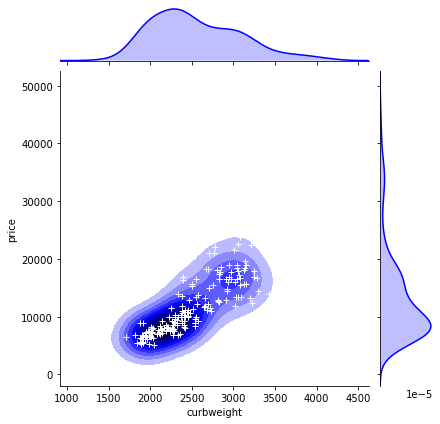

In [80]:
g = sns.jointplot(x="curbweight", y="price", data=auto_data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("curbweight", "price");

*points are scattered after curbweight of 2900, initially it is increasing as curbweight increases as you can alse see in the joint plot color becomes lighter after curbweight of 2900 .

### Engine size Vs Price

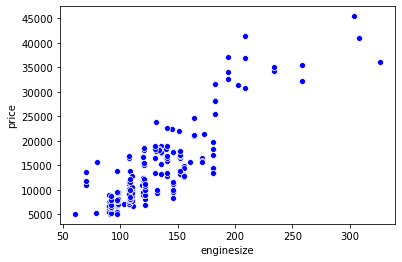

In [81]:
sns.scatterplot(x="enginesize", y="price", data=auto_data,color='b')

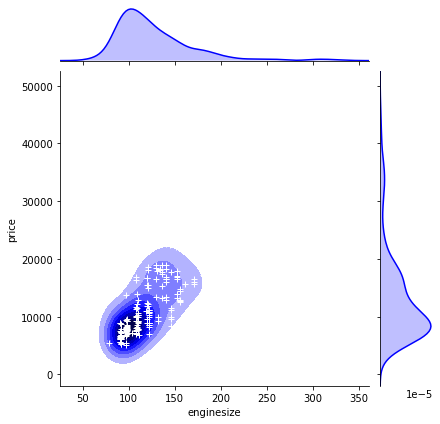

In [82]:
g = sns.jointplot(x="enginesize", y="price", data=auto_data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("enginesize", "price");

*points are scattered after engine size of 140, initially it is increasing as curbweight increases as you can alse see in the joint plot color becomes lighter after engine size of 140 .

### Boreratio vs Price

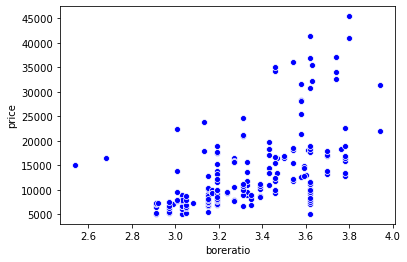

In [83]:
sns.scatterplot(x="boreratio", y="price", data=auto_data,color='b')

### Stroke vs price

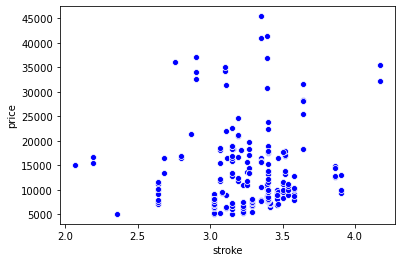

In [84]:
sns.scatterplot(x="stroke", y="price", data=auto_data,color='b')

*very weak correlation between stroke vs price

### Compression ratio vs Price

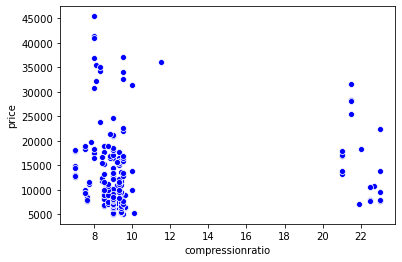

In [85]:
sns.scatterplot(x="compressionratio", y="price", data=auto_data,color='b')

*no relation between compression ratio and price

### Citympg vs Price

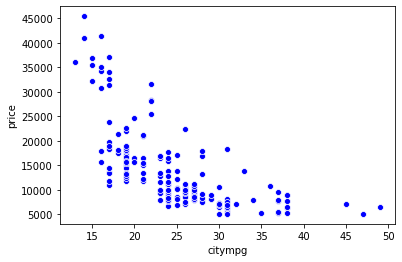

In [86]:
sns.scatterplot(x="citympg", y="price", data=auto_data,color='b')

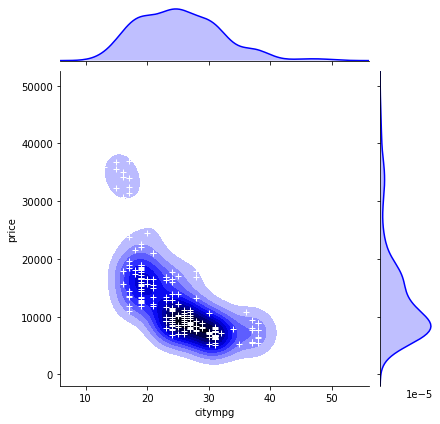

In [87]:
g = sns.jointplot(x="citympg", y="price", data=auto_data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("citympg", "price");

*negative correlation is seen between citympg and price

### Highwaympg vs Price

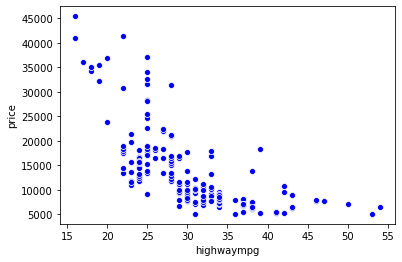

In [89]:
sns.scatterplot(x="highwaympg", y="price", data=auto_data,color='b')

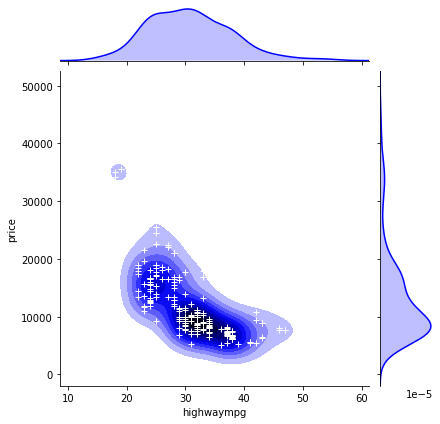

In [90]:
g = sns.jointplot(x="highwaympg", y="price", data=auto_data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("highwaympg", "price");

*negative correlation between highwaympg and price

### Pairplot of all numerical features

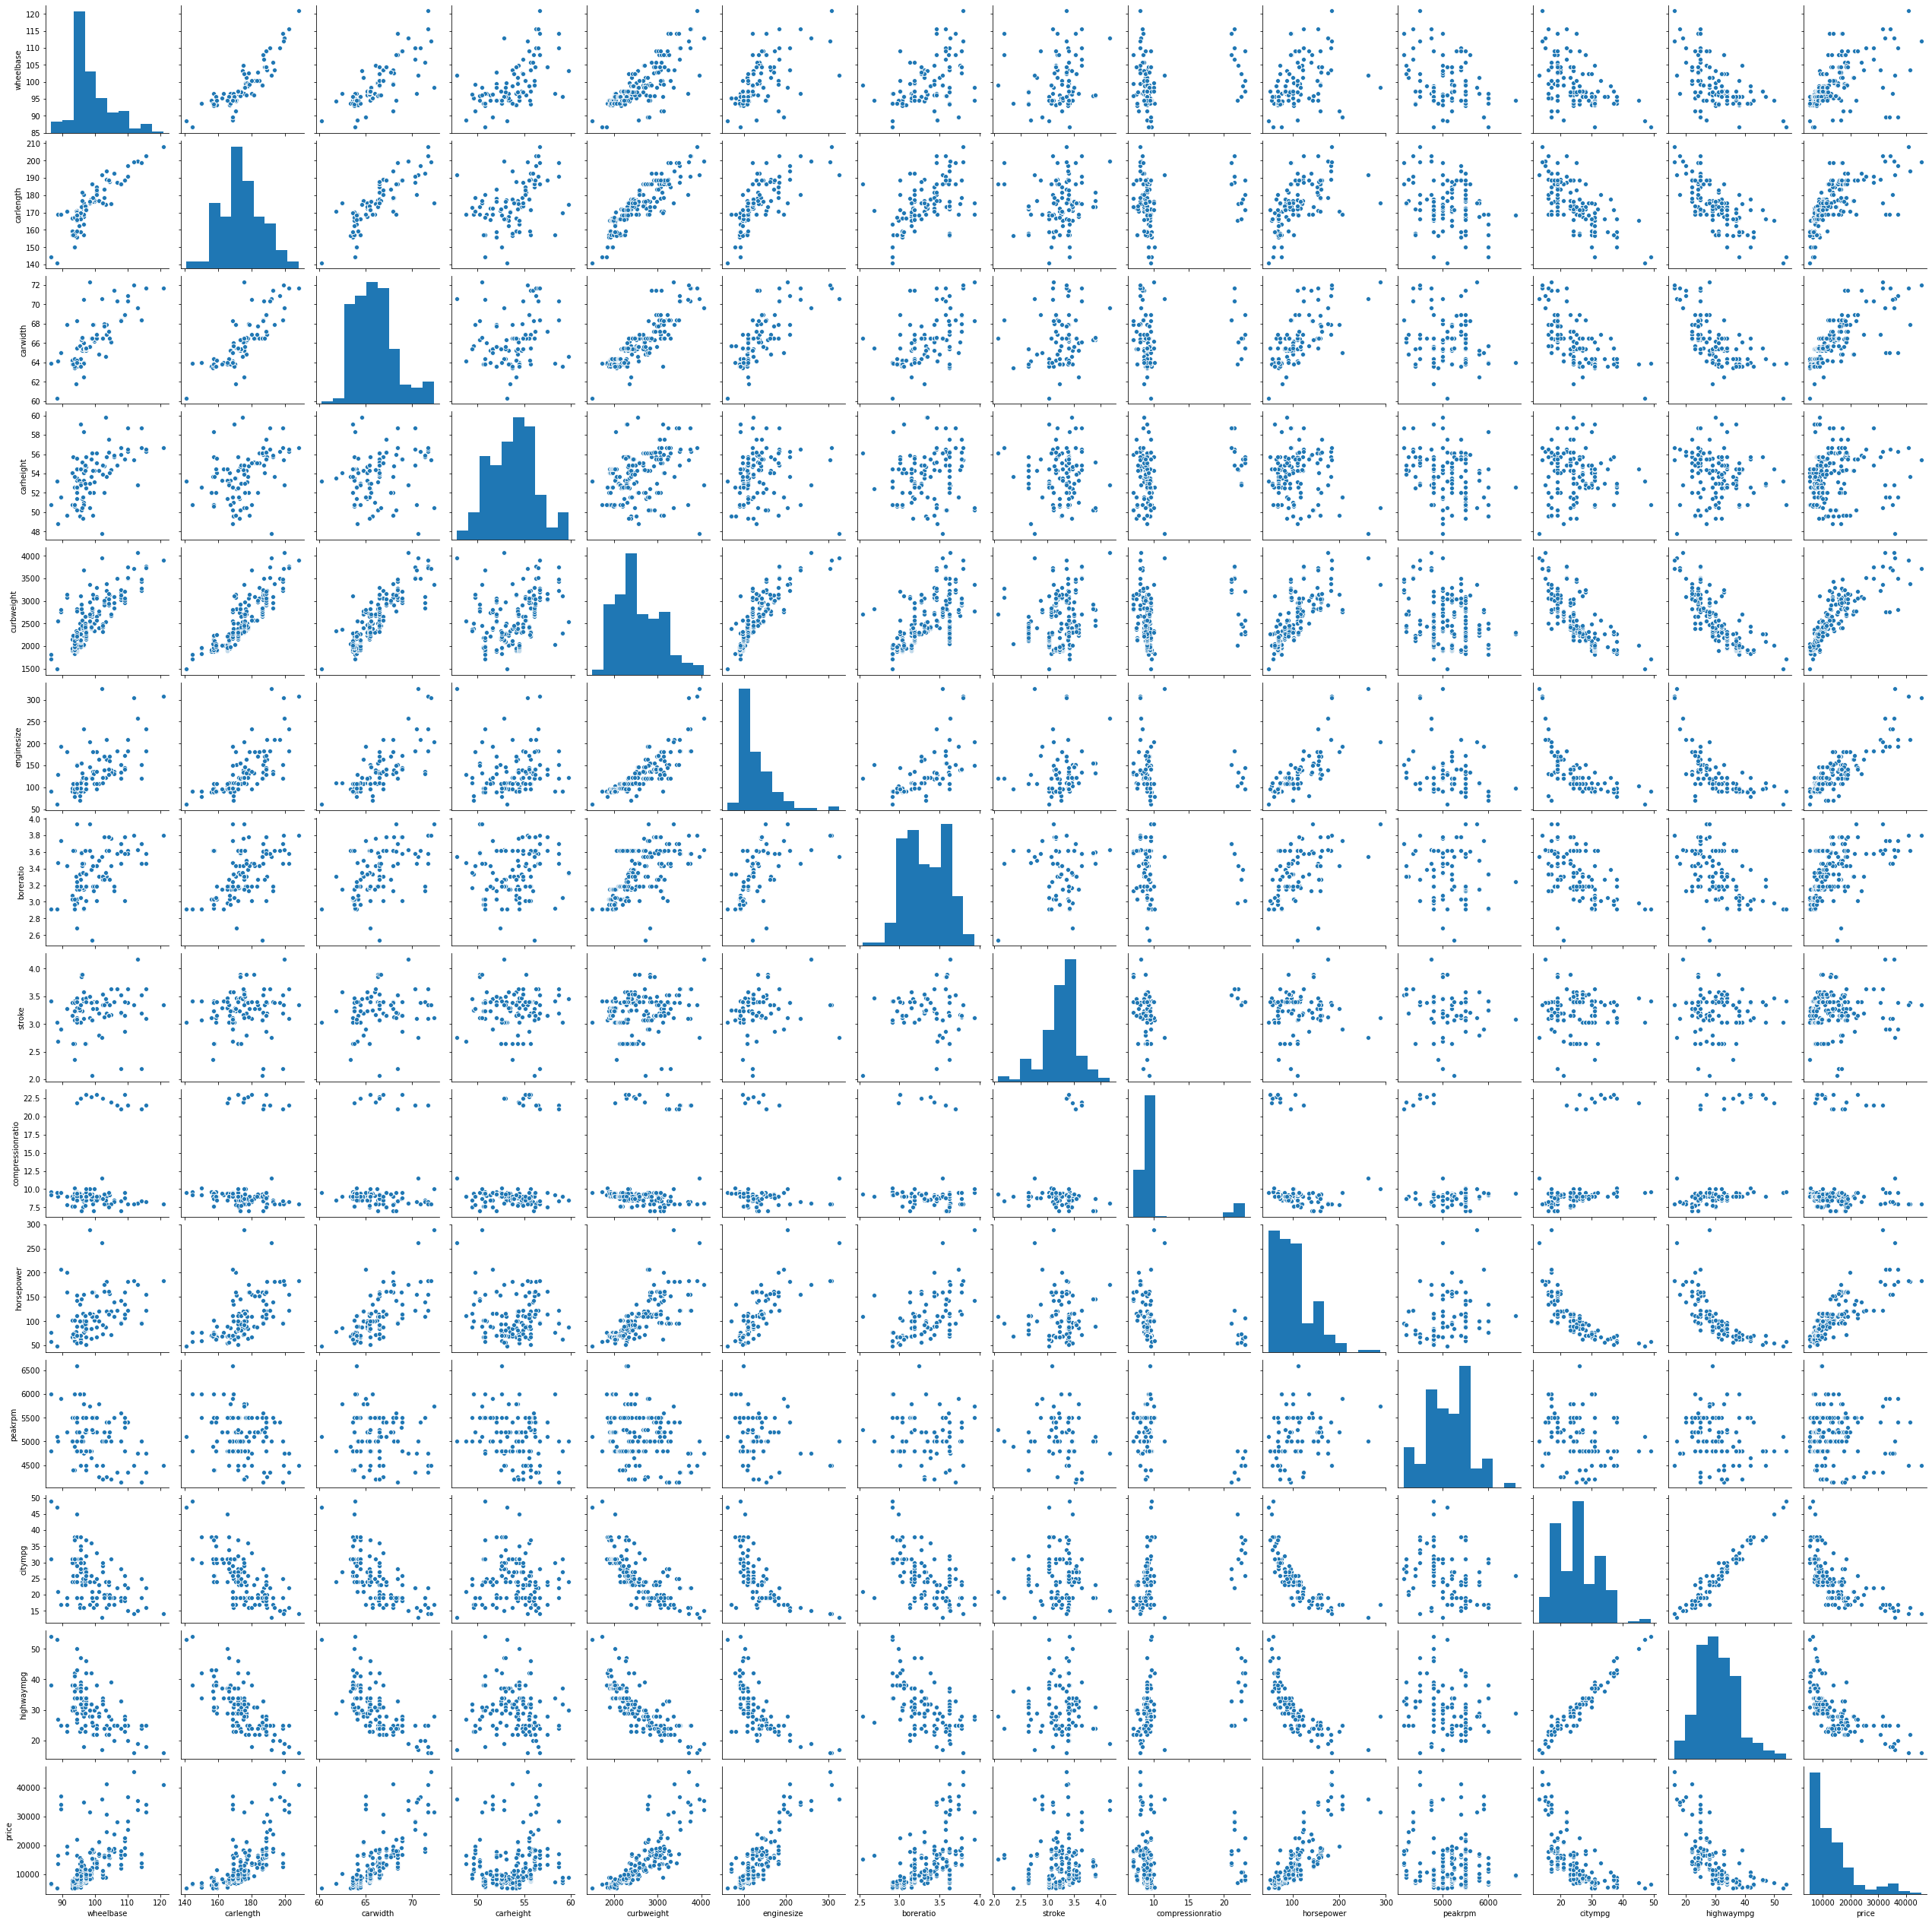

In [91]:
ax = sns.pairplot(auto_data[numerical_cols])

### Correlation matrix

In [92]:
auto_data[numerical_cols].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


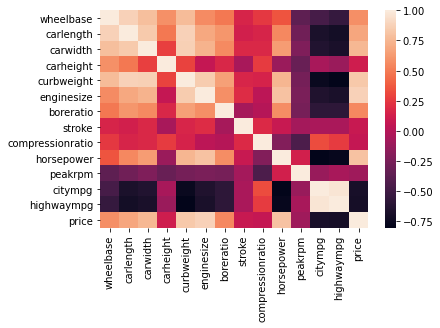

In [93]:
sns.heatmap(auto_data[numerical_cols].corr())

-wheelbase has high positive correlation with carlength,carwidth and curbweight

-carlength has high postive correlation with curbweight

-carlength has negative correlation with highwaympg

-carwidth has high postive correlation with curbweight and engine size

-enginesize has high positive correlation with horsepower

-curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg

-horsepower has negative correlation with citympg and highwaympg

-citympg and highwaympg are highly correlated

### Scatter plot of wheelbase , carlength,carheight and carweight with price

In [94]:
col=['wheelbase','carlength','carwidth','curbweight','price']

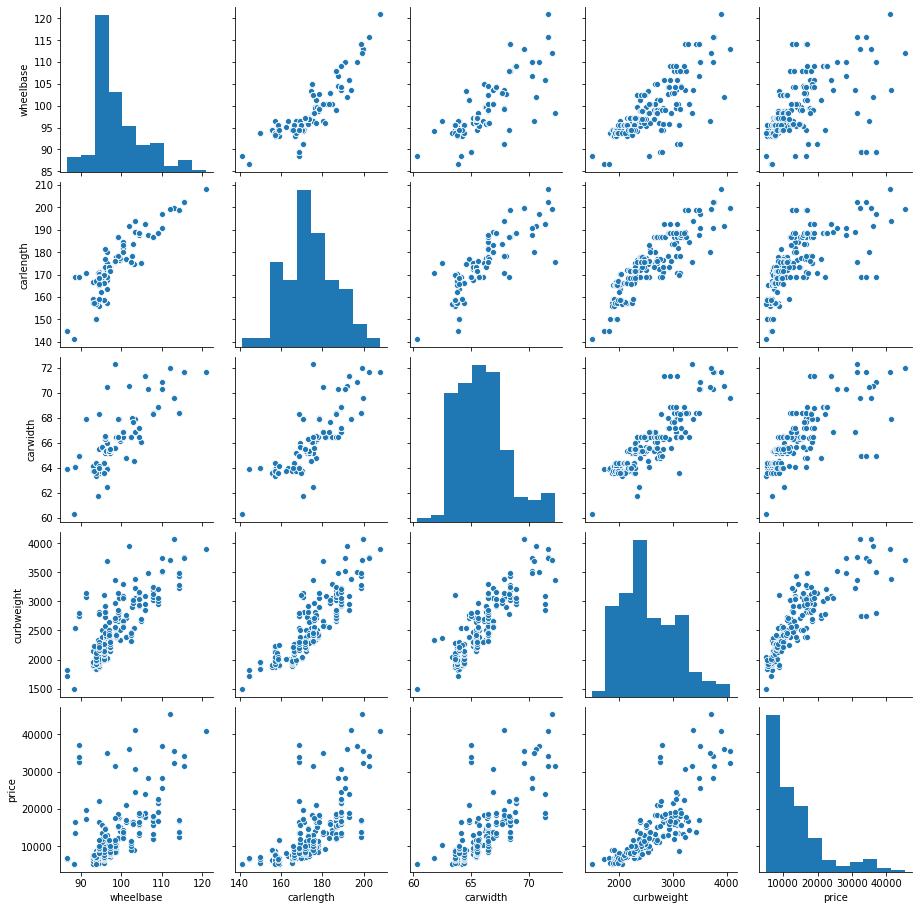

In [95]:
sns.pairplot(auto_data[col])

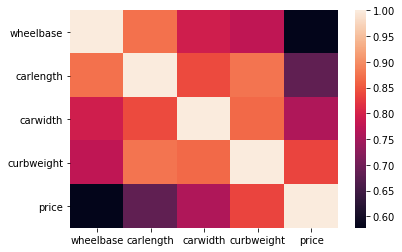

In [96]:
sns.heatmap(auto_data[col].corr())

### Scatter plot of carlength,curbweight,highwaympg with price

In [97]:
col=['carlength','highwaympg','curbweight','price']

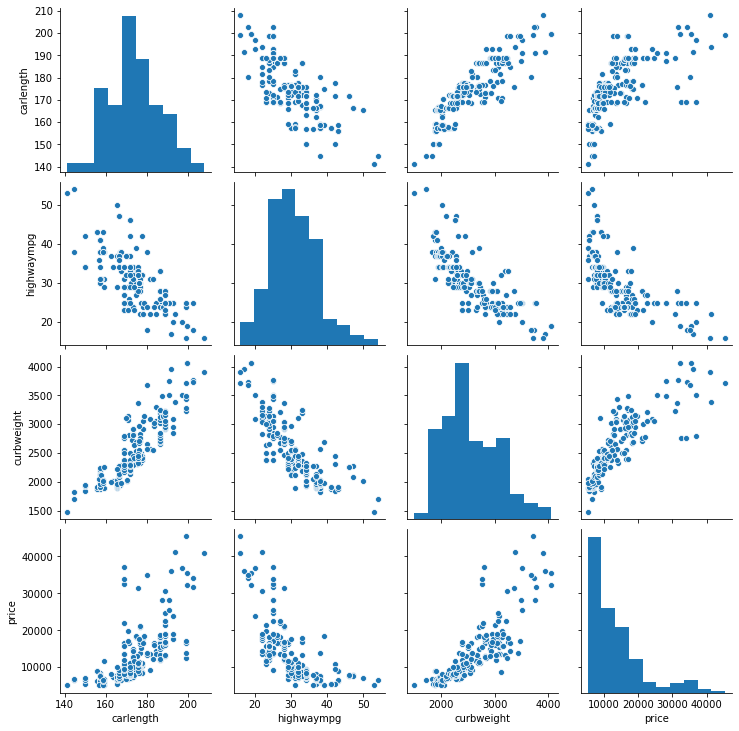

In [98]:
sns.pairplot(auto_data[col])

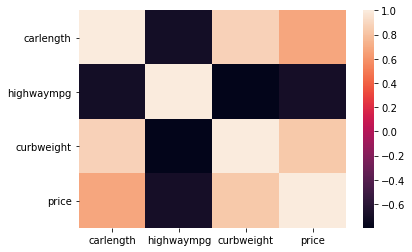

In [99]:
sns.heatmap(auto_data[col].corr())

### Scatter plot of carwidth,curbweight ,engine size and price

In [100]:
col=['carwidth','curbweight','enginesize','price']

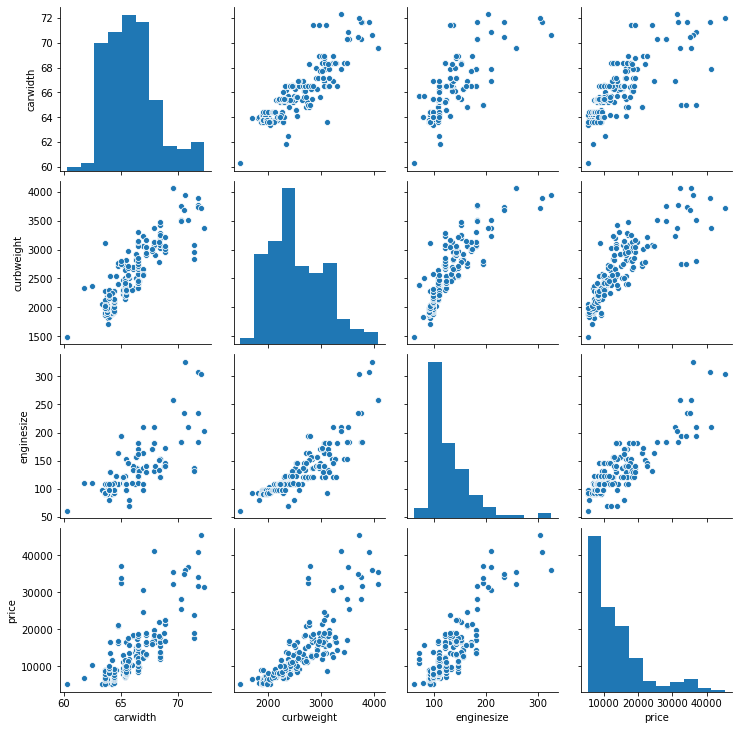

In [101]:
sns.pairplot(auto_data[col])

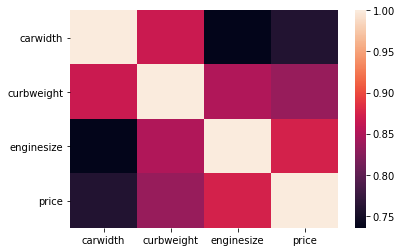

In [102]:
sns.heatmap(auto_data[col].corr())

### Scatter plot of curbweight ,engine size ,horse power,highwaympg and price

In [103]:
col=['curbweight','enginesize','horsepower','highwaympg','price']

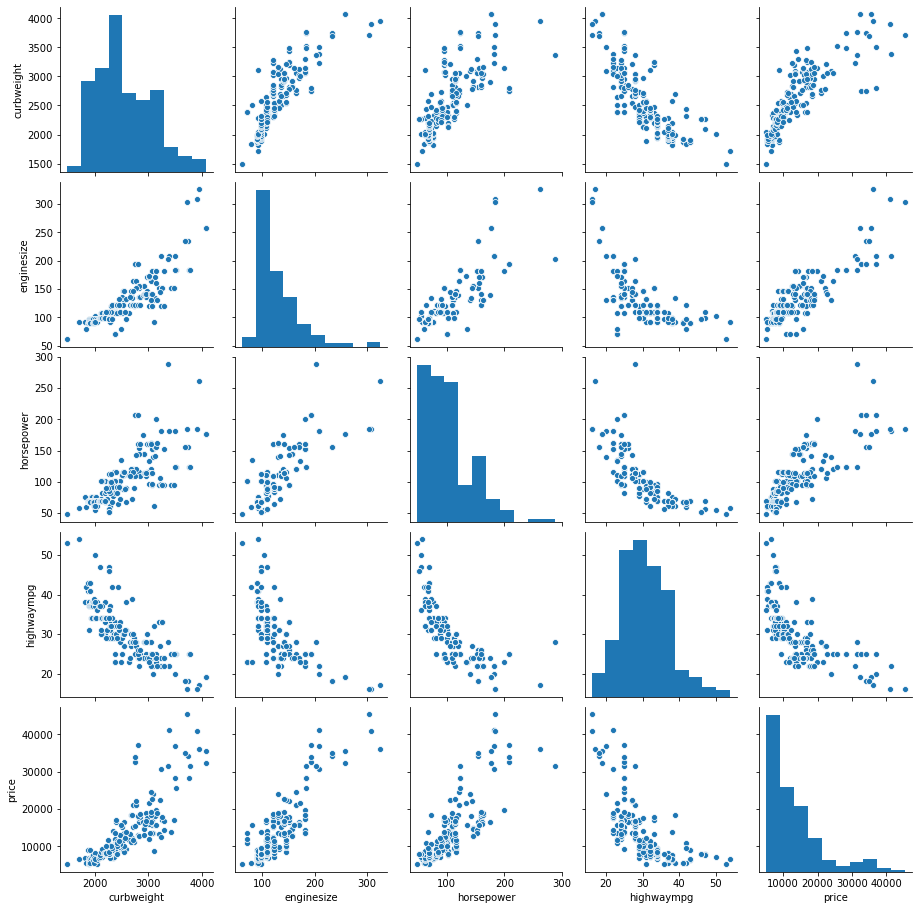

In [104]:
sns.pairplot(auto_data[col])

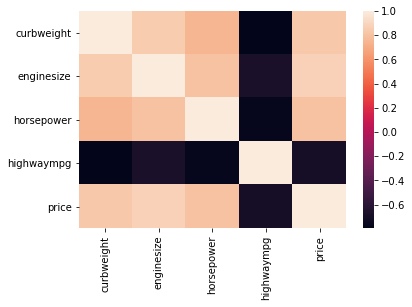

In [105]:
sns.heatmap(auto_data[col].corr())

### Horsepower,citympg , highway mpg and price

In [106]:
col=['horsepower','citympg','highwaympg','price']

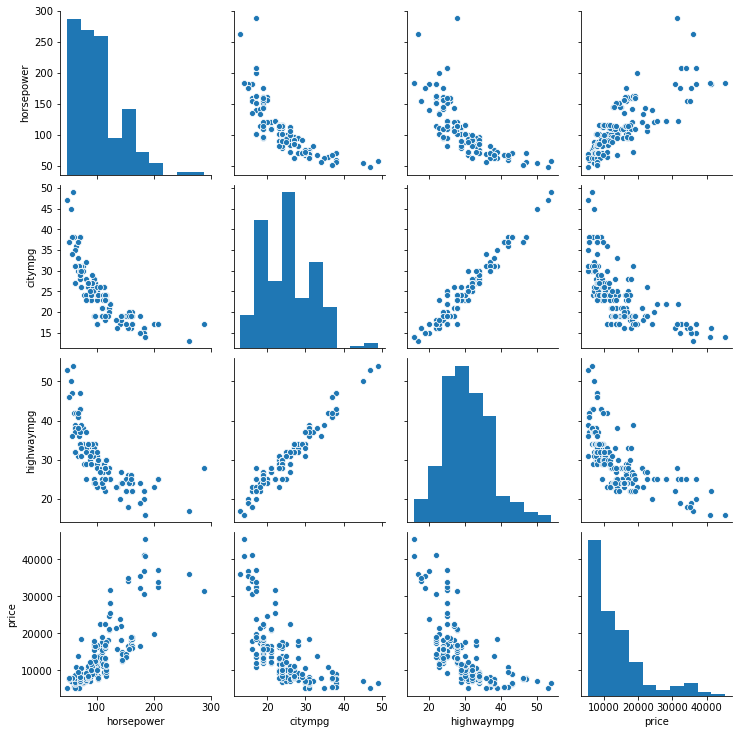

In [108]:
sns.pairplot(auto_data[col])

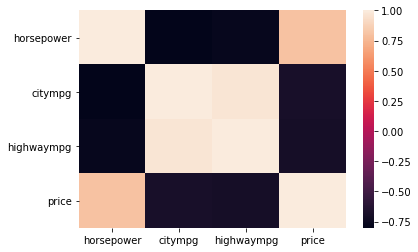

In [109]:
sns.heatmap(auto_data[col].corr())

### Horsepower Vs Car Body categorized by carbody

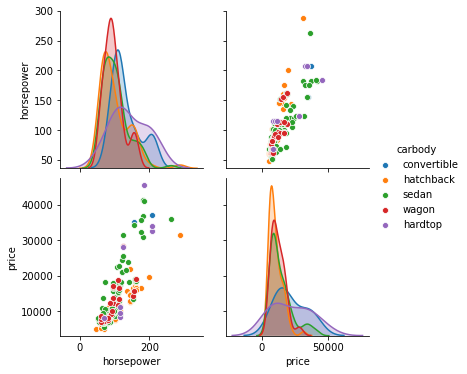

In [110]:
sns.pairplot(auto_data[['horsepower','price','carbody']], hue="carbody");

### Fitting all features with price

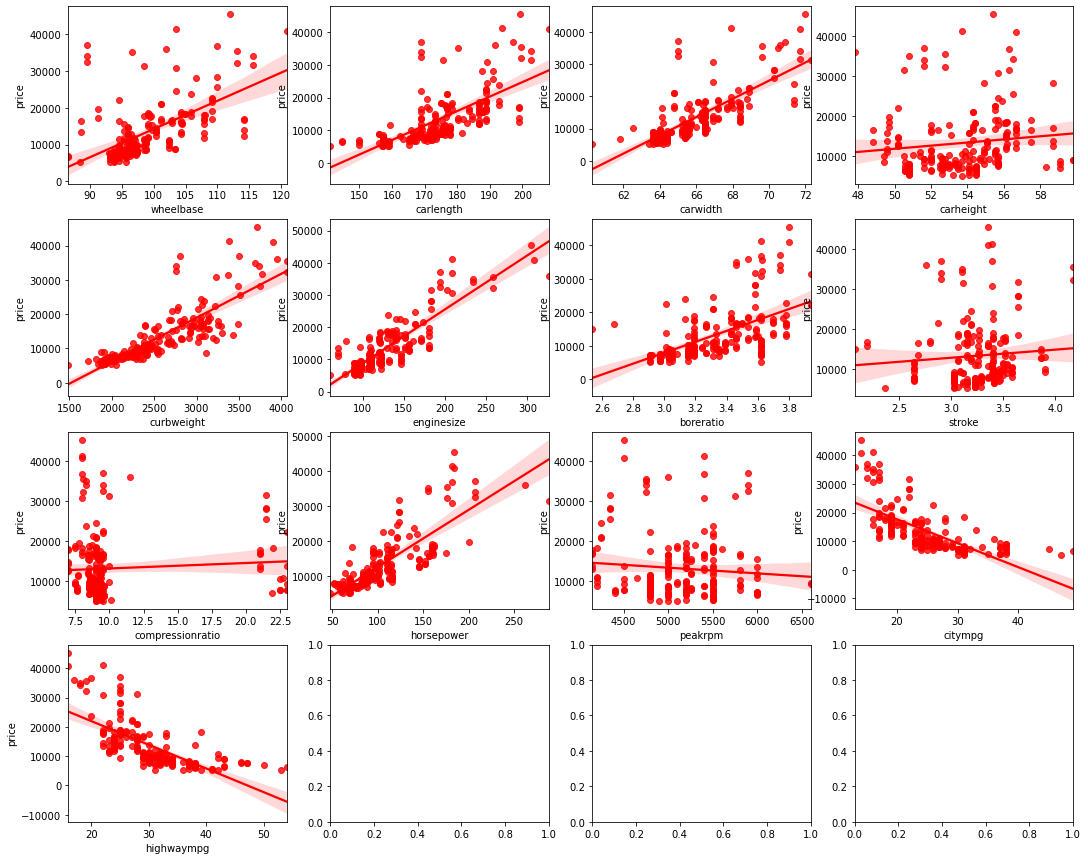

In [111]:
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):
    
    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=auto_data,ax=axes[x][y],color='r')

# 3. Feature Selection

In [112]:
X=auto_data[numerical_cols].drop('price',axis=1)
y=auto_data['price']

### Recursive feature elimination (RFE) with random forest

In [114]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [116]:
X = auto_data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['make','price'],axis=1)
y=auto_data['price']

In [117]:
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [118]:
features=list(X.columns[rfe.support_])

### 4. Data Modelling and Evaluation

In [119]:
x = X[features]
y = auto_data.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

# Linear Regression

In [120]:
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test,y_test)

0.7299712173396138

# Decision Tree Regressor

In [121]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.8699113195927972

# Random Forest regressor

In [122]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9146935875209264

# Conclusion

-We applied three models Linear Regression Decision Tree Regressor,and RandomForest Regressor

-As we can see random forest performing best (with accuracy ~ 0.90)